# Table of Contents
## 1. Import Libraries & Data
## 2. Pick out Variables
## 3. Create a Correlation Matrix Heatmap
## 4. Create a Scatterplot
## 5. Create a Pair Plot
## 6. Create a Categorical Plot
## 7. Answers to Questions
## 8. Define Hypotheses
## 9. Save Data

#### Note: Between the last notebook and this notebook, I created 3 new columns where I aggregated by average for years, one for 1950-1974; 1975-1999; 2000-2020, in Excel.

## 1. Import Libraries & Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Import Data
birds = pd.read_csv(r'/Users/lynnsey/Desktop/Bootcamp/Tasks/Immersion/Task 6/09-07-2023 Living Planet Index Analysis/02 Data/Prepared Data/birds_v4.csv', index_col = False)

In [3]:
#Show all columns
pd.set_option('display.max_columns', None)

In [4]:
#Looking at data
birds.head()

,id,scientific_name,class,order,family,genus,species,common_name,country,region,system,avg_1950_to_1974,avg_1975_to_1999,avg_2000_to_2020,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Balearica_regulorum,Aves,Gruiformes,Gruidae,Balearica,regulorum,Grey-crowned crane,Uganda,Africa,Terrestrial,1962.0,7.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Acrocephalus_sechellensis,Aves,Passeriformes,Acrocephalidae,Acrocephalus,sechellensis,Seychelles warbler,Seychelles,Africa,Terrestrial,30.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Copsychus_sechellarum,Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,Seychelles magpie-robin,Seychelles,Africa,Terrestrial,30.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,41.0,NaN,NaN,21.0,24.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Copsychus_sechellarum,Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,Seychelles magpie-robin,Seychelles,Africa,Terrestrial,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,39.0,38.0,38.0,38.0,24.0,24.0,21.0,25.0,26.0,NaN,23.0,20.0,23.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Falco_punctatus,Aves,Falconiformes,Falconidae,Falco,punctatus,Mauritius kestrel,Mauritius,Africa,Terrestrial,2.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,4.0,8.0,2.0,2.0,4.0,4.0,8.0,8.0,14.0,14.0,14.0,18.0,16.0,18.0,26.0,28.0,44.0,52.0,80.0,104.0,116.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Pick out Variables

In [5]:
#Create a dataframe with only relevant columns
birds_heat = birds.drop(columns = ['system', 'id', 'scientific_name', 'class', 'order', 'family', 'genus', 'species', 'common_name', 'country', 'region', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

In [6]:
#Checking to make sure worked correctly
birds_heat.head()

,avg_1950_to_1974,avg_1975_to_1999,avg_2000_to_2020
0,1962.0,7.0,11.0
1,30.0,352.0,NaN
2,30.0,27.0,NaN
3,NaN,29.0,NaN
4,2.0,31.0,NaN


## 3. Create a Correlation Matrix Heatmap

In [7]:
# Create a correlation matrix using pandas

birds_heat.corr()

,avg_1950_to_1974,avg_1975_to_1999,avg_2000_to_2020
avg_1950_to_1974,1.000000,0.204522,0.403829
avg_1975_to_1999,0.204522,1.000000,0.674146
avg_2000_to_2020,0.403829,0.674146,1.000000


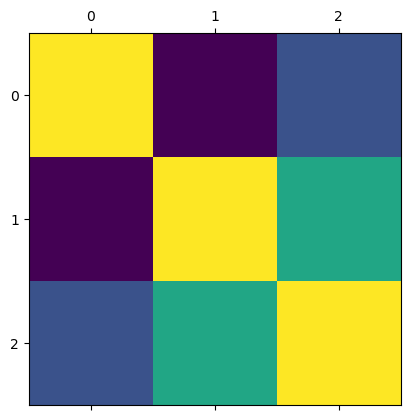

In [8]:
# Create a correlation heatmap using matplotlib

plt.matshow(birds_heat.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

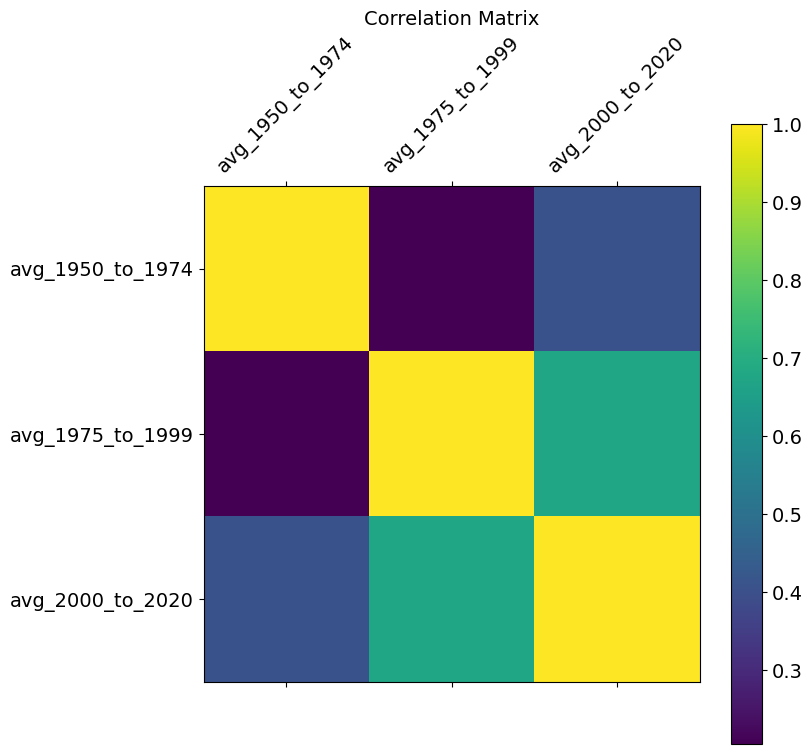

In [9]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(birds_heat.corr(), fignum=f.number) # type of plot
plt.xticks(range(birds_heat.shape[1]), birds_heat.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(birds_heat.shape[1]), birds_heat.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### The only quantitative variables I have in my dataset are the yearly data.  So a correlation matrix heatmap is not the appropriate tool to use for this dataset.  However, I wanted to learn more about correlation heatmap matrices, so I input the yearly data averages, just to have output.  What I see is that there is a a weak relationship between the bird count for the years between 1950-1974 and 1975-2000.  There is a moderate relationship between 1950-1974 and 2000-2020. There is a strong relationship between 1975-1999 and 2000-2020.   

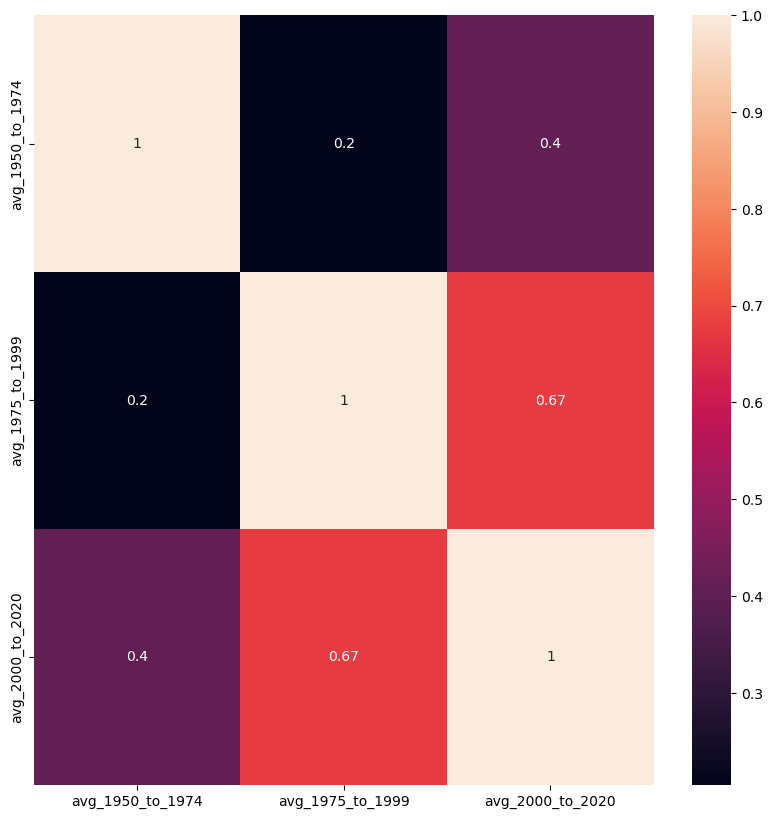

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(birds_heat.corr(), annot = True, ax = ax) 

## 4. Create a Scatterplot

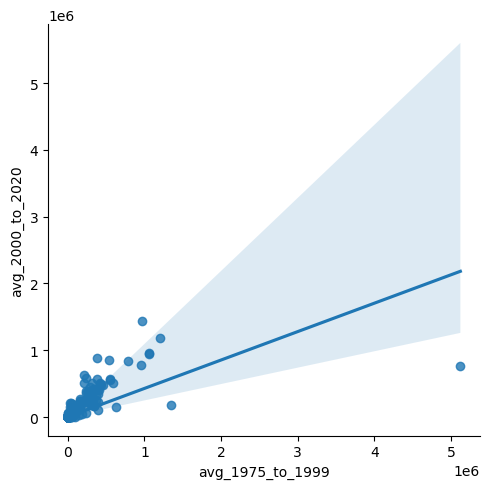

In [11]:
# Create a scatterplot for the "avg_1975_to_1999" and "avg_2000_to_2020" columns in seaborn

sns.lmplot(x = 'avg_1975_to_1999', y = 'avg_2000_to_2020', data = birds_heat)

### The scatterplot shows that there is a great degree of variability.  Most of the dots are clustered around 0, which shows me that when there is no data for years 1975-1999, there is generally no data for years 2000-2020.  There are a few outliers here.  I would say that this isn't a purely linear relationship. Again, this isn't an appropriate way to analyze my data, but I'm doing it for the purpose of learning, to show that I know how to make a scatterplot and read one.

## 5. Create a Pair Plot

In [3]:
#Create a dataframe with only relevant columns
birds_pair = birds.drop(columns = ['id', 'class', 'family', 'genus', 'species', 'common_name', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

In [13]:
birds_pair.head()

,scientific_name,order,country,region,system,avg_1950_to_1974,avg_1975_to_1999,avg_2000_to_2020
0,Balearica_regulorum,Gruiformes,Uganda,Africa,Terrestrial,1962.0,7.0,11.0
1,Acrocephalus_sechellensis,Passeriformes,Seychelles,Africa,Terrestrial,30.0,352.0,NaN
2,Copsychus_sechellarum,Passeriformes,Seychelles,Africa,Terrestrial,30.0,27.0,NaN
3,Copsychus_sechellarum,Passeriformes,Seychelles,Africa,Terrestrial,NaN,29.0,NaN
4,Falco_punctatus,Falconiformes,Mauritius,Africa,Terrestrial,2.0,31.0,NaN


In [ ]:
# Create a pair plot 
pair = sns.pairplot(birds_pair)

### I couldn't get the pairplot to run, so in a separate notebook, I wrangled the data some more and was able to get it up and running.

## 6. Create a Categorical Plot

<Axes: xlabel='order', ylabel='Count'>

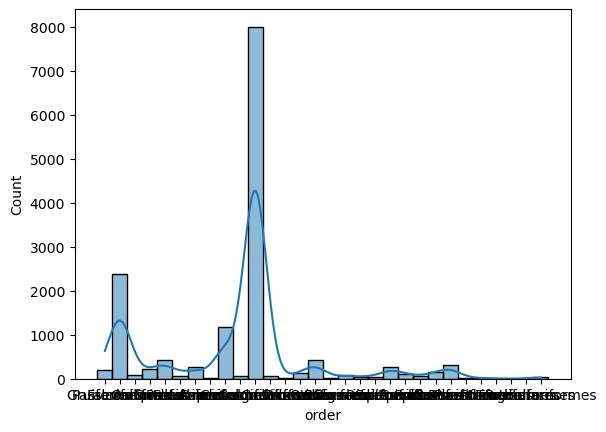

In [14]:
#Creating a categorical plot of 'order' to see how many of each order of birds are represented
sns.histplot(birds['order'], kde = True)

/var/folders/kk/6z0tdmb13cd8dwpkbrq630qw0000gn/T/ipykernel_30896/4235009593.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)


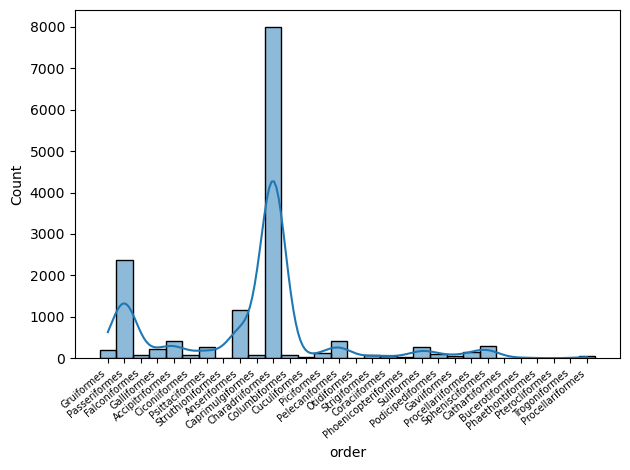

In [15]:
# Making the x-axis more legible
ax = sns.histplot(birds['order'], kde = True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.tight_layout()
plt.show()

### This plot tells me that scientists did counts on Charadriiformes (Shorebirds) at a much higher rate than any of the other type of birds.

<Axes: xlabel='system', ylabel='Count'>

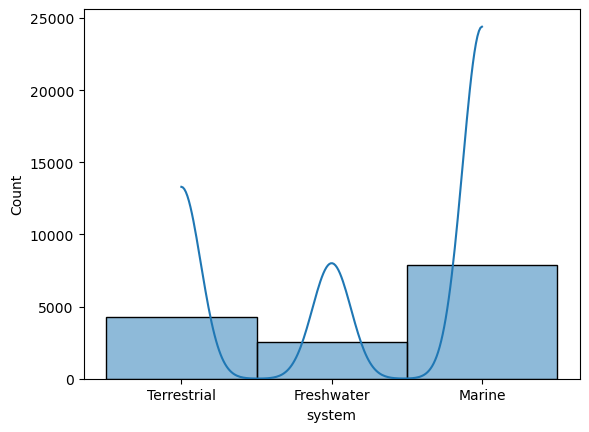

In [16]:
#Creating a categorical plot of 'system' to see how many of each order of birds are represented
sns.histplot(birds['system'], kde = True)

### This histogram is not normal and shows that there are more marine birds counted than terrestrial or freshwater birds.

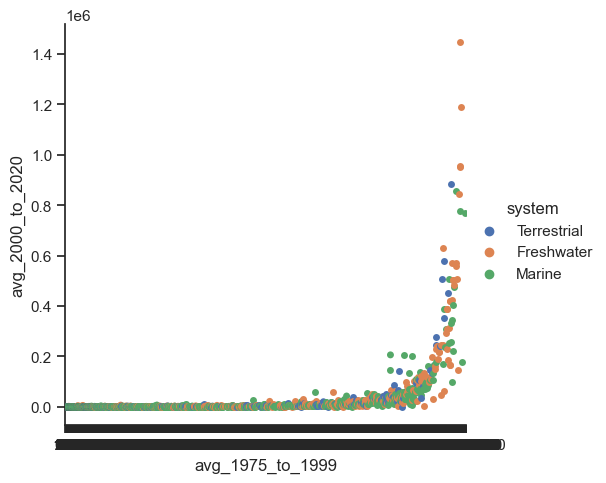

In [17]:
# Create a categorical plot in seaborn using system

sns.set(style="ticks")
g = sns.catplot(x='avg_1975_to_1999', y='avg_2000_to_2020', hue="system", data=birds)

### I tried, on this plot, to put only 20 tickmarks so that the black bar would disappear, but since a lot of my values were NaN, it didn't let me do this.  Yet again, though, this doesn't seem like the appropriate way to analyze my data.  

## 7. Answers to Questions

### These were my initial questions.  I found, though, that the type of plots used in this task, didn't meet the needs of my data.  I'm mostly interested in looking at geographical and time-series questions.
#### •	How have population numbers for individual species changed over time?
#### •	Are certain geographic areas losing more species?
#### •	Has habitat loss affected these numbers, i.e. growing urbanization.
#### •	Does human population size growth affect population numbers for birds?
#### •	Which countries have the highest number of species?
#### •	How rapid has the population change?  Do government conservation efforts affect population numbers in animals?
#### •	What bird has the highest population size? the lowest? 
#### •	Does the system an animal live in affect its population size?

### The main takeaway I learned from this exercise was that shorebirds have been counted the most and most of the species in my data set are marine birds.


## 8. Define Hypotheses

### I didn't  gain a whole lot from analyzing my data in this way.  So my hypotheses are based on EDA.

#### Since 1950, the number of birds in the world has decreased.
#### Terrestrial birds have declined at a faster rate than marine or freshwater birds.
#### Bird species that live in developed countries have a smaller population size from 2000-2020, than those in developing countries.
#### There are less birds in countries with more pollution from the years 2000-2020.
#### Hummingbirds (Order: Trochilidae), which are the smallest birds, have the smallest population size.
#### Pigeons and Doves (Order: Columbidae), have the largest population size.